In [2]:
print(8*9)

72


In [2]:
# !pip install selenium
# !pip install webdriver-manager  # no need to download any driver file

In [3]:
from selenium import webdriver
from selenium.webdriver.edge.service import Service
from webdriver_manager.microsoft import EdgeChromiumDriverManager

''' previously it was used 
# PATH = "C:Program Files (x86)/msedgedriver.exe"
# driver = webdriver.Edge()
'''

driver = webdriver.Edge(service=Service(EdgeChromiumDriverManager().install()))
driver.maximize_window()    # to maximize the web page
driver.get('https://www.screener.in/')


In [7]:
# used if it close automatically
from selenium import webdriver
from selenium.webdriver.edge.service import Service
from webdriver_manager.microsoft import EdgeChromiumDriverManager
from selenium.webdriver.edge.options import Options

edge_options = Options()
edge_options.add_experimental_option("detach",True)

driver = webdriver.Edge(service=Service(EdgeChromiumDriverManager().install()),options=edge_options) # it was closing on its own to not able to do it 
driver.get('https://www.screener.in/')


### Different methods

In [4]:
from selenium import webdriver
from selenium.webdriver.edge.service import Service
from webdriver_manager.microsoft import EdgeChromiumDriverManager
from selenium.webdriver.common.by import By
from selenium.webdriver.common.keys import Keys # to use enter 
import time


driver = webdriver.Edge(service=Service(EdgeChromiumDriverManager().install()))
# driver.maximize_window()    # to maximize the web page
driver.get('https://www.screener.in/')

# xpath Method
input = driver.find_element(By.XPATH,'/html/body/main/div[2]/div/div/div/input')
input.send_keys("Vedanta")
input.send_keys(Keys.RETURN)

# classmethod
# input = driver.find_element(By.CLASS_NAME,'u-full-width')
# input.send_keys("Vedanta")

# tagname method
# input = driver.find_element(By.TAG_NAME,'input')
# input.send_keys("Vedanta")

# name method
# driver.get("https://www.google.com")
# input = driver.find_element(By.NAME,'q').send_keys("Ferrari")

# Partial link text
# driver.find_element(By.PARTIAL_LINK_TEXT,"Gmail").click()

# Link text
# driver.find_element(By.LINK_TEXT,'Login').click()


# **For multiple rows**

In [16]:
print(7*9)

63


In [26]:
from selenium import webdriver
from selenium.webdriver.edge.service import Service
from webdriver_manager.microsoft import EdgeChromiumDriverManager
from selenium.webdriver.common.by import By
from selenium.webdriver.common.keys import Keys # to use enter 
import time

username = "melibi8600@exclussi.com"
password = "screener@12345"

driver = webdriver.Edge(service=Service(EdgeChromiumDriverManager().install()))
# driver.maximize_window()    # to maximize the web page
driver.get('https://www.screener.in/')

driver.find_element(By.XPATH,"/html/body/nav/div[2]/div/div/div/div[2]/div[2]/a[1]").click()
driver.find_element(By.NAME,"username").send_keys(username)
time.sleep(1)
driver.find_element(By.NAME,"password").send_keys(password)
time.sleep(1)
driver.find_element(By.XPATH,"/html/body/main/div[2]/div[2]/form/button").click()
time.sleep(1)
driver.find_element(By.XPATH,"/html/body/div/div[2]/main/div[1]/div[2]/a[1]").click()

data = {}

tr_rows = driver.find_elements(By.XPATH,"/html/body/main/div[3]/div[3]/table/tbody/tr")
req_rows = len(tr_rows)
# req_rows = 15

for cols in range(2,19):
    head = driver.find_element(By.XPATH,f'/html/body/main/div[3]/div[3]/table/tbody/tr[1]/th[{cols}]').text
    data[head]=[]
    head=''

for rows in range(2,req_rows+1):
    for cols in range(2,19):
        head = driver.find_element(By.XPATH,f'/html/body/main/div[3]/div[3]/table/tbody/tr[1]/th[{cols}]').text
        if rows != 17:
            if cols>=2:
                value=driver.find_element(By.XPATH,f'/html/body/main/div[3]/div[3]/table/tbody/tr[{rows}]/td[{cols+1}]').text
        else:
            continue
        data[head].append(value)
        head,value='',''

time.sleep(1)
print("Your data is Scrap from Screener.in")
driver.close()

Your data is Scrap from Screener.in


## **Insert into Postgres**

In [27]:
import psycopg2

conn = None
cur = None

try:
    conn = psycopg2.connect(host='localhost', dbname='postgres',user='postgres',password="mypass",port=5432)
    cur = conn.cursor()
    cols = [col.replace(" ",'_') for col,_ in data.items()]
    cols = [col.replace('%','PERCENT') for col in cols]
    cols = [col.replace('.','') for col in cols]
    cols = [col.replace('/','BY') for col in cols]
    rows = [v for _,v in data.items()]
    cur.execute("select name from stocks")
    conn.commit()
    company_name = []
    for i in cur.fetchall():
        company_name.append(i[0])

    row_data = []
    li =[]

    # print(cols)

    for row in range(len(rows)):
        for col in range(len(rows[row])):
            for r in range(len(rows)):
                if rows[r][col] == '':
                    li.append(0)
                    continue
                li.append(rows[r][col])
            row_data.append(li)
            li=[]
        break
    
    for row in row_data:
        if row[0] not in company_name:
            print(row[0])
            cur.execute(f"""
                insert into stocks ({', '.join(cols)})
                values ({', '.join(['%s'] * len(cols))})
            """,row)
            conn.commit()
            print("Inserted into stocks table.")
        

except Exception as e:
    print(e)
finally:
    if cur is not None:
        cur.close()
    if conn is not None:
        conn.close()

MRP Agro
Inserted into stocks table.
India Cem. Cap.
Inserted into stocks table.
OK Play India
Inserted into stocks table.
Lagnam Spintex
Inserted into stocks table.
Evoq Remedies
Inserted into stocks table.
Apollo Tyres
Inserted into stocks table.
P N Gadgil Jewe.
Inserted into stocks table.
Eternal Ltd
Inserted into stocks table.
HDFC Bank
Inserted into stocks table.
Hind. Unilever
Inserted into stocks table.
LTIMindtree
Inserted into stocks table.
L&T Technology
Inserted into stocks table.
TCS
Inserted into stocks table.
Hexaware Tech.
Inserted into stocks table.
O N G C
Inserted into stocks table.
I O C L
Inserted into stocks table.
Indus Towers
Inserted into stocks table.
Envirotech
Inserted into stocks table.
Menon Pistons
Inserted into stocks table.
Nestle India
Inserted into stocks table.
Coal India
Inserted into stocks table.
Titan Company
Inserted into stocks table.
ITC
Inserted into stocks table.
Jubilant Food.
Inserted into stocks table.
Infosys
Inserted into stocks table.


### **Implementation on the data from the postgres**

In [1]:
import psycopg2
import numpy as np
import pandas as pd

conn = None
cur = None

try:
    conn = psycopg2.connect(host='localhost', dbname='postgres', user='postgres', password='mypass', port=5432)
    cur = conn.cursor()

    cur.execute("select * from stocks")
    conn.commit()
    li=[]
    for i in cur.fetchall():
        li.append(i)

    cur.execute(f"""
        select column_name, data_type
        from information_schema.columns
        where table_schema='public'
        and table_name = 'stocks';
        """)
    columns = cur.fetchall()
    col=[]
    for c,_ in columns:
        col.append(c)

except Exception as e:
    print(e)
finally:
    if cur is not None:
        cur.close()
    if conn is not None:
        conn.close()

In [2]:
col = []
for c,_ in columns:
    col.append(c)
col

['id',
 'name',
 'cmp_rs',
 'mar_cap_rscr',
 'div_yld_percent',
 'np_qtr_rscr',
 'qtr_profit_var_percent',
 'qtr_sales_var_percent',
 'roce_percent',
 'roe_percent',
 'sales_growth_percent',
 'profit_growth_percent',
 'no_of_share_holders',
 'eps_12m_rs',
 'ev_by_ebitda',
 'rsi',
 'current_ratio',
 'debt_by_eq']

### High quality stocks

In [3]:
import pandas as pd

df = pd.DataFrame(li,columns=col)
df.head(3)

,id,name,cmp_rs,mar_cap_rscr,div_yld_percent,np_qtr_rscr,qtr_profit_var_percent,qtr_sales_var_percent,roce_percent,roe_percent,sales_growth_percent,profit_growth_percent,no_of_share_holders,eps_12m_rs,ev_by_ebitda,rsi,current_ratio,debt_by_eq
0,1,MRP Agro,130.00,144.41,0.00,2.26,769.23,219.86,39.18,30.31,140.56,590.00,591.00,6.21,13.00,47.59,13.63,0.00
1,2,India Cem. Cap.,16.05,34.84,0.00,0.05,-64.29,-20.39,1.31,3.10,-22.90,-62.91,16222.00,0.26,74.28,59.71,7.57,2.44
2,3,OK Play India,12.01,363.04,0.00,-2.71,-45.88,-4.76,7.74,-0.60,-7.50,-151.19,31671.00,-0.03,13.66,47.28,1.33,0.73


Converting columns to float type

fdf = df.iloc[:,2:].astype(float)

n = df.iloc[:,[2]].astype(str)

i = df.iloc[:,0].astype(int)

df.info()

To convert numeric values to float previously they are in object

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25 entries, 0 to 24
Data columns (total 18 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   id                      25 non-null     int64 
 1   name                    25 non-null     object
 2   cmp_rs                  25 non-null     object
 3   mar_cap_rscr            25 non-null     object
 4   div_yld_percent         25 non-null     object
 5   np_qtr_rscr             25 non-null     object
 6   qtr_profit_var_percent  25 non-null     object
 7   qtr_sales_var_percent   25 non-null     object
 8   roce_percent            25 non-null     object
 9   roe_percent             25 non-null     object
 10  sales_growth_percent    25 non-null     object
 11  profit_growth_percent   25 non-null     object
 12  no_of_share_holders     25 non-null     object
 13  eps_12m_rs              25 non-null     object
 14  ev_by_ebitda            25 non-null     object
 15  rsi     

In [5]:
for col in df.columns:
    try:
        df[col] = pd.to_numeric(df[col])
    except ValueError:
        continue

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25 entries, 0 to 24
Data columns (total 18 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   id                      25 non-null     int64  
 1   name                    25 non-null     object 
 2   cmp_rs                  25 non-null     float64
 3   mar_cap_rscr            25 non-null     float64
 4   div_yld_percent         25 non-null     float64
 5   np_qtr_rscr             25 non-null     float64
 6   qtr_profit_var_percent  25 non-null     float64
 7   qtr_sales_var_percent   25 non-null     float64
 8   roce_percent            25 non-null     float64
 9   roe_percent             25 non-null     float64
 10  sales_growth_percent    25 non-null     float64
 11  profit_growth_percent   25 non-null     float64
 12  no_of_share_holders     25 non-null     float64
 13  eps_12m_rs              25 non-null     float64
 14  ev_by_ebitda            25 non-null     floa

In [7]:
import pandas as pd

df
# df=pd.DataFrame(li,columns=col)
'''
ROE > 15 
ROCE > 15 
EPS > 10 
Sales growth > 10 
Profit growth > 10 
EVEBITDA < 10 
Dividend yield > 1 
RSI < 60 AND
Market Capitalization > 1000
'''
# df[(df['roe_percent']>15) & 
#    (df['roce_percent']>15) &
#    (df['eps_12m_rs']>10) &
#    (df['ev_by_ebitda']>10) &
#    (df['div_yld_percent']>1) &
#    (df['rsi']<70) &
#    (df['mar_cap_rscr']>1000) &
#    (df['sales_growth_percent']>10) & 
#    (df['profit_growth_percent']>10)]


high_quality = df[(df['roe_percent']>15) & 
   (df['roce_percent']>15) &
   (df['eps_12m_rs']>10) &
   (df['ev_by_ebitda']>10) &
   (df['div_yld_percent']>1) &
   (df['rsi']<70) &
   (df['mar_cap_rscr']>1000)]


high_quality

,id,name,cmp_rs,mar_cap_rscr,div_yld_percent,np_qtr_rscr,qtr_profit_var_percent,qtr_sales_var_percent,roce_percent,roe_percent,sales_growth_percent,profit_growth_percent,no_of_share_holders,eps_12m_rs,ev_by_ebitda,rsi,current_ratio,debt_by_eq
10,11,LTIMindtree,4191.90,124199.94,1.55,1086.70,-7.14,7.15,31.17,25.03,5.14,-0.56,433377.0,154.29,16.83,37.81,3.47,0.11
11,12,L&T Technology,4234.50,44834.76,1.18,300.80,-6.29,12.29,33.40,25.79,10.07,-1.28,231067.0,116.77,21.79,40.71,2.64,0.12
12,13,TCS,3298.90,1193570.89,1.67,12293.00,-1.69,5.29,64.63,52.38,5.99,4.14,2115093.0,134.20,16.65,33.02,1.74,0.10
22,23,ITC,427.25,534665.77,3.22,5013.18,-8.40,9.28,37.47,28.43,7.73,-2.09,3647886.0,16.12,18.32,67.42,3.05,0.00
24,25,Infosys,1419.50,589555.75,2.68,7038.00,-11.75,7.92,37.79,29.05,6.06,2.64,2546234.0,64.32,13.38,30.98,2.27,0.09


### Undervalued stocks

In [8]:
'''
    ROE > 15
    DEBT-BY-EQ < 0.5
    CURRENT-RATIO > 2
'''

under_value = df[(df['roe_percent']>15) &
   (df['debt_by_eq']<0.5) &
   (df['current_ratio']>2)]
under_value

,id,name,cmp_rs,mar_cap_rscr,div_yld_percent,np_qtr_rscr,qtr_profit_var_percent,qtr_sales_var_percent,roce_percent,roe_percent,sales_growth_percent,profit_growth_percent,no_of_share_holders,eps_12m_rs,ev_by_ebitda,rsi,current_ratio,debt_by_eq
0,1,MRP Agro,130.00,144.41,0.00,2.26,769.23,219.86,39.18,30.31,140.56,590.00,591.0,6.21,13.00,47.59,13.63,0.00
6,7,P N Gadgil Jewe.,544.25,7385.93,0.00,85.23,49.32,24.13,30.82,32.39,37.78,178.88,201809.0,16.25,21.02,53.75,2.14,0.16
10,11,LTIMindtree,4191.90,124199.94,1.55,1086.70,-7.14,7.15,31.17,25.03,5.14,-0.56,433377.0,154.29,16.83,37.81,3.47,0.11
11,12,L&T Technology,4234.50,44834.76,1.18,300.80,-6.29,12.29,33.40,25.79,10.07,-1.28,231067.0,116.77,21.79,40.71,2.64,0.12
17,18,Envirotech,107.00,201.05,0.00,2.83,24.12,-12.83,74.01,87.15,64.98,344.75,947.0,8.54,11.90,54.66,4.51,0.30
18,19,Menon Pistons,55.41,282.59,1.80,5.82,33.79,6.57,25.20,20.59,-0.04,8.75,29646.0,5.26,6.02,55.75,2.48,0.11
22,23,ITC,427.25,534665.77,3.22,5013.18,-8.40,9.28,37.47,28.43,7.73,-2.09,3647886.0,16.12,18.32,67.42,3.05,0.00
24,25,Infosys,1419.50,589555.75,2.68,7038.00,-11.75,7.92,37.79,29.05,6.06,2.64,2546234.0,64.32,13.38,30.98,2.27,0.09


### High quality & undervalued stocks

In [9]:
high_undervalued = pd.merge(high_quality,under_value,how='inner',on='name')
high_undervalued

,id_x,name,cmp_rs_x,mar_cap_rscr_x,div_yld_percent_x,np_qtr_rscr_x,qtr_profit_var_percent_x,qtr_sales_var_percent_x,roce_percent_x,roe_percent_x,...,roce_percent_y,roe_percent_y,sales_growth_percent_y,profit_growth_percent_y,no_of_share_holders_y,eps_12m_rs_y,ev_by_ebitda_y,rsi_y,current_ratio_y,debt_by_eq_y
0,11,LTIMindtree,4191.90,124199.94,1.55,1086.70,-7.14,7.15,31.17,25.03,...,31.17,25.03,5.14,-0.56,433377.0,154.29,16.83,37.81,3.47,0.11
1,12,L&T Technology,4234.50,44834.76,1.18,300.80,-6.29,12.29,33.40,25.79,...,33.40,25.79,10.07,-1.28,231067.0,116.77,21.79,40.71,2.64,0.12
2,23,ITC,427.25,534665.77,3.22,5013.18,-8.40,9.28,37.47,28.43,...,37.47,28.43,7.73,-2.09,3647886.0,16.12,18.32,67.42,3.05,0.00
3,25,Infosys,1419.50,589555.75,2.68,7038.00,-11.75,7.92,37.79,29.05,...,37.79,29.05,6.06,2.64,2546234.0,64.32,13.38,30.98,2.27,0.09


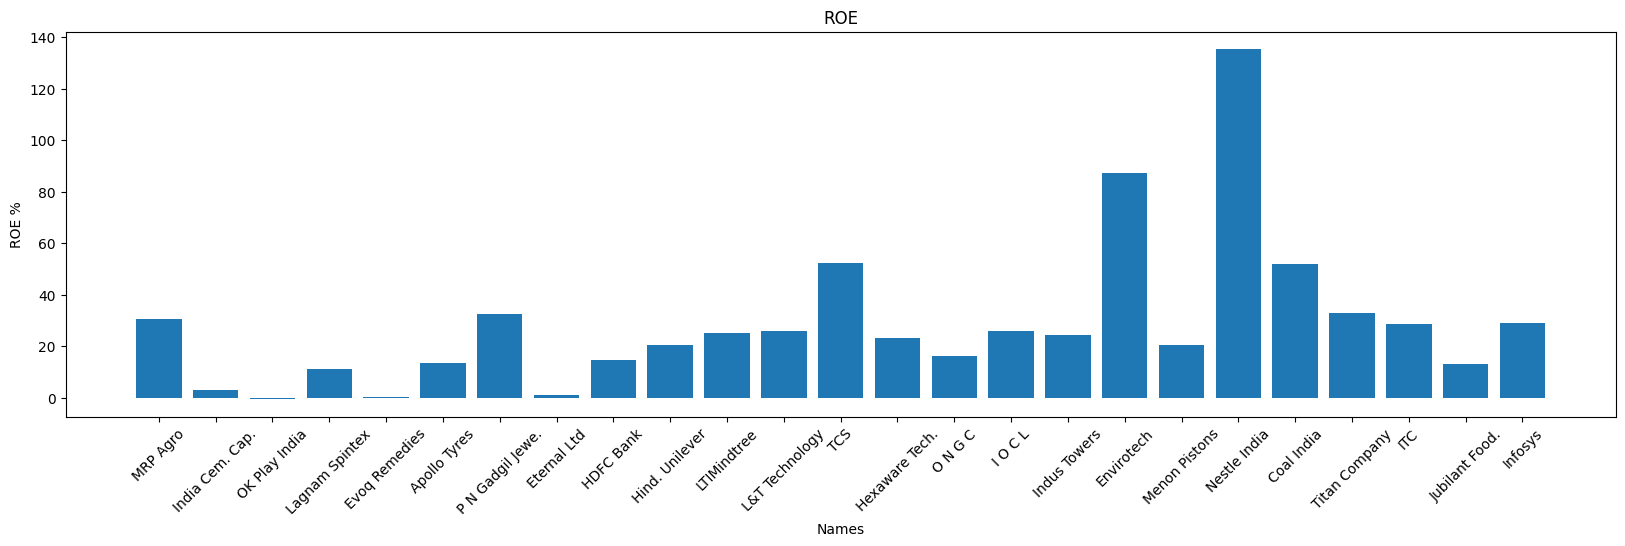

In [10]:
import matplotlib.pyplot as plt

x = df['name'].tolist()
y = df['roe_percent'].tolist()


plt.figure(figsize=(20,5))
plt.bar(x,y)
plt.title('ROE')
plt.xlabel('Names')
plt.xticks(rotation=45)
plt.ylabel('ROE %')
plt.show()

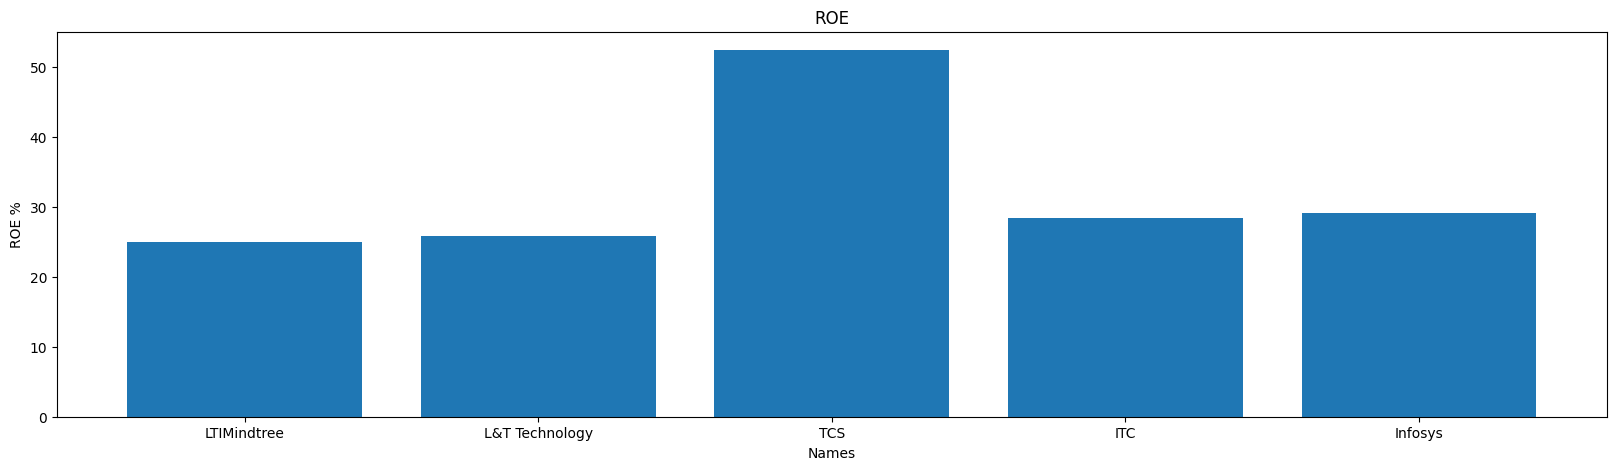

In [11]:
import matplotlib.pyplot as plt

x = high_quality['name'].tolist()
y = high_quality['roe_percent'].tolist()


plt.figure(figsize=(20,5))
plt.bar(x,y)
plt.title('ROE')
plt.xlabel('Names')
plt.ylabel('ROE %')
plt.show()

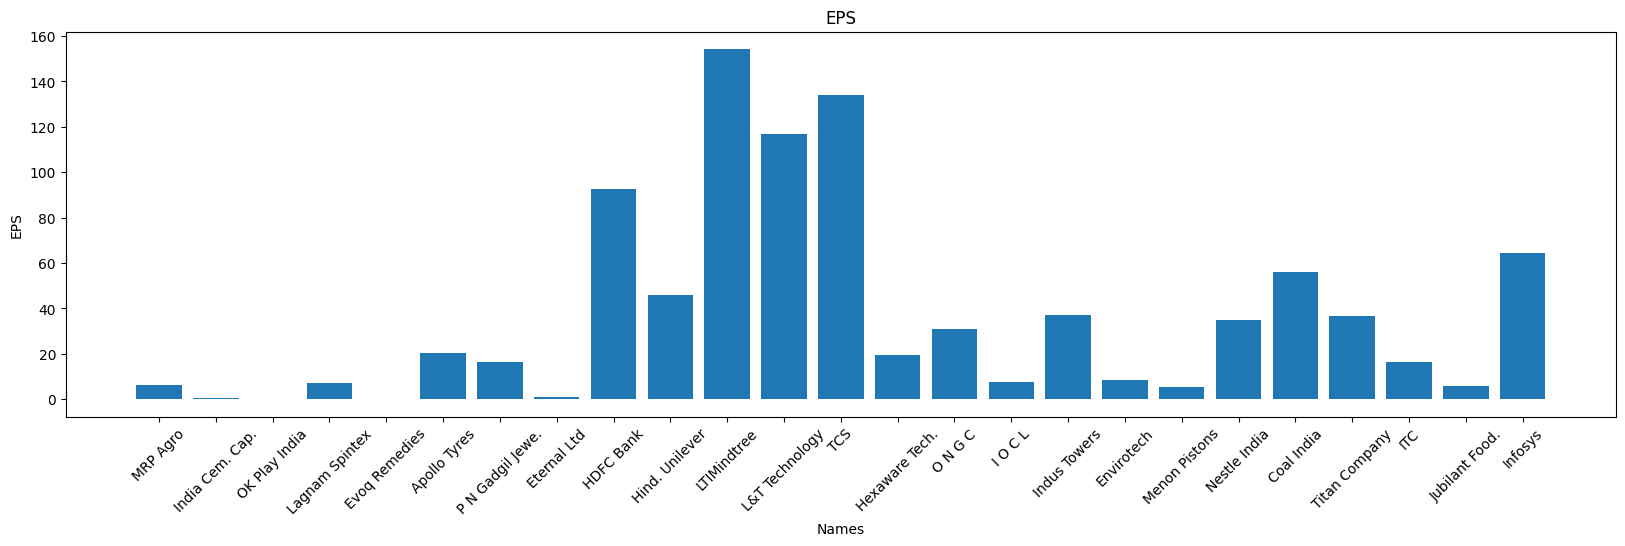

In [12]:
import matplotlib.pyplot as plt

x = df['name'].tolist()
y = df['eps_12m_rs'].tolist()


plt.figure(figsize=(20,5))
plt.bar(x,y)
plt.title('EPS')
plt.xlabel('Names')
plt.xticks(rotation=45)
plt.ylabel('EPS')
plt.show()

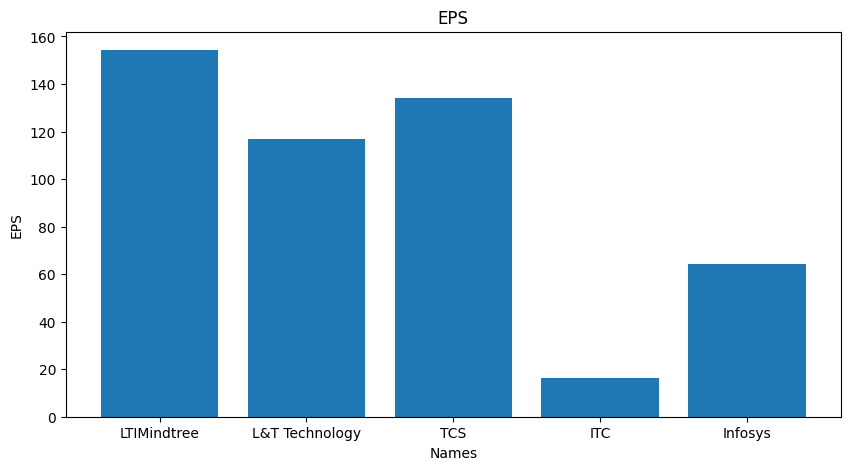

In [13]:
import matplotlib.pyplot as plt

x = high_quality['name'].tolist()
y = high_quality['eps_12m_rs'].tolist()

plt.figure(figsize=(10,5))
plt.bar(x,y)
plt.title('EPS')
plt.xlabel('Names')
plt.ylabel('EPS')
plt.show()

In [14]:
# df['roe_percent'].max()
# df['name'].tolist()
df.describe()

,id,cmp_rs,mar_cap_rscr,div_yld_percent,np_qtr_rscr,qtr_profit_var_percent,qtr_sales_var_percent,roce_percent,roe_percent,sales_growth_percent,profit_growth_percent,no_of_share_holders,eps_12m_rs,ev_by_ebitda,rsi,current_ratio,debt_by_eq
count,25.000000,25.00000,2.500000e+01,25.000000,25.00000,25.000000,25.000000,25.000000,25.000000,25.000000,25.000000,2.500000e+01,25.000000,25.000000,25.000000,25.000000,25.00000
mean,13.000000,1112.49520,2.491511e+05,1.562000,3001.50840,43.924000,327.581200,32.122000,28.677200,26.076400,257.215600,1.136309e+06,36.666000,26.219200,56.370000,2.737600,0.83520
std,7.359801,1380.81016,3.742588e+05,2.235255,4885.88271,173.090254,1544.929882,34.487016,29.134034,47.680806,1127.922147,1.328037e+06,43.887615,29.373961,12.489704,3.081315,1.46852
min,1.000000,2.96000,7.370000e+00,0.000000,-2.71000,-81.870000,-20.390000,0.440000,-0.600000,-22.900000,-151.190000,5.910000e+02,-0.030000,4.040000,30.980000,0.000000,0.00000
25%,7.000000,130.00000,3.630400e+02,0.000000,8.54000,-17.970000,1.610000,11.200000,13.220000,2.330000,-11.810000,3.167100e+04,6.210000,9.230000,47.280000,1.060000,0.09000
50%,13.000000,427.25000,1.072315e+05,0.860000,337.25000,-5.280000,7.150000,25.200000,24.190000,6.060000,0.400000,4.333770e+05,19.360000,16.830000,57.850000,1.740000,0.12000
75%,19.000000,1906.70000,2.954108e+05,1.770000,4003.20000,24.120000,20.580000,37.470000,30.310000,37.780000,10.780000,2.279035e+06,45.720000,31.730000,65.520000,2.640000,0.75000
max,25.000000,4234.50000,1.459049e+06,8.940000,19284.57000,769.230000,7740.000000,169.080000,135.330000,190.370000,5625.000000,3.829146e+06,154.290000,140.540000,75.790000,13.630000,6.46000


In [15]:
d = df.iloc[:,2:].corr()
d

,cmp_rs,mar_cap_rscr,div_yld_percent,np_qtr_rscr,qtr_profit_var_percent,qtr_sales_var_percent,roce_percent,roe_percent,sales_growth_percent,profit_growth_percent,no_of_share_holders,eps_12m_rs,ev_by_ebitda,rsi,current_ratio,debt_by_eq
cmp_rs,1.000000,0.387491,-0.079691,0.198743,-0.195977,-0.170825,0.292177,0.266331,-0.259249,-0.149942,0.029020,0.850192,0.024125,-0.278471,-0.218886,0.019204
mar_cap_rscr,0.387491,1.000000,0.171130,0.893008,-0.191451,-0.142870,0.088307,0.083726,-0.217917,-0.033112,0.705146,0.539512,-0.045614,-0.006338,-0.304503,0.429200
div_yld_percent,-0.079691,0.171130,1.000000,0.341733,-0.284563,-0.152879,0.071095,0.056101,-0.351930,-0.179302,0.625536,0.103050,-0.342384,0.013333,-0.276227,-0.136992
np_qtr_rscr,0.198743,0.893008,0.341733,1.000000,-0.155642,-0.133376,0.030251,0.032811,-0.244846,-0.141677,0.733735,0.500423,-0.256412,-0.003623,-0.305624,0.450503
qtr_profit_var_percent,-0.195977,-0.191451,-0.284563,-0.155642,1.000000,0.392375,-0.011995,-0.032229,0.751747,-0.027530,-0.314352,-0.177347,-0.137864,-0.163722,0.807286,-0.165302
qtr_sales_var_percent,-0.170825,-0.142870,-0.152879,-0.133376,0.392375,1.000000,-0.192956,-0.205002,0.735271,-0.053342,-0.182023,-0.179067,0.099832,-0.177527,0.448315,-0.121724
roce_percent,0.292177,0.088307,0.071095,0.030251,-0.011995,-0.192956,1.000000,0.972503,-0.134864,-0.156967,-0.038935,0.200725,-0.105835,0.045056,-0.083939,-0.318369
roe_percent,0.266331,0.083726,0.056101,0.032811,-0.032229,-0.205002,0.972503,1.000000,-0.105165,-0.157414,-0.044633,0.165482,-0.112955,0.097894,-0.096922,-0.235961
sales_growth_percent,-0.259249,-0.217917,-0.351930,-0.244846,0.751747,0.735271,-0.134864,-0.105165,1.000000,0.250135,-0.244367,-0.296930,0.180591,-0.166911,0.683060,-0.120032
profit_growth_percent,-0.149942,-0.033112,-0.179302,-0.141677,-0.027530,-0.053342,-0.156967,-0.157414,0.250135,1.000000,0.227871,-0.184514,0.789247,0.089655,0.028119,-0.131342


In [16]:
df.iloc[:,2:].corr()

,cmp_rs,mar_cap_rscr,div_yld_percent,np_qtr_rscr,qtr_profit_var_percent,qtr_sales_var_percent,roce_percent,roe_percent,sales_growth_percent,profit_growth_percent,no_of_share_holders,eps_12m_rs,ev_by_ebitda,rsi,current_ratio,debt_by_eq
cmp_rs,1.000000,0.387491,-0.079691,0.198743,-0.195977,-0.170825,0.292177,0.266331,-0.259249,-0.149942,0.029020,0.850192,0.024125,-0.278471,-0.218886,0.019204
mar_cap_rscr,0.387491,1.000000,0.171130,0.893008,-0.191451,-0.142870,0.088307,0.083726,-0.217917,-0.033112,0.705146,0.539512,-0.045614,-0.006338,-0.304503,0.429200
div_yld_percent,-0.079691,0.171130,1.000000,0.341733,-0.284563,-0.152879,0.071095,0.056101,-0.351930,-0.179302,0.625536,0.103050,-0.342384,0.013333,-0.276227,-0.136992
np_qtr_rscr,0.198743,0.893008,0.341733,1.000000,-0.155642,-0.133376,0.030251,0.032811,-0.244846,-0.141677,0.733735,0.500423,-0.256412,-0.003623,-0.305624,0.450503
qtr_profit_var_percent,-0.195977,-0.191451,-0.284563,-0.155642,1.000000,0.392375,-0.011995,-0.032229,0.751747,-0.027530,-0.314352,-0.177347,-0.137864,-0.163722,0.807286,-0.165302
qtr_sales_var_percent,-0.170825,-0.142870,-0.152879,-0.133376,0.392375,1.000000,-0.192956,-0.205002,0.735271,-0.053342,-0.182023,-0.179067,0.099832,-0.177527,0.448315,-0.121724
roce_percent,0.292177,0.088307,0.071095,0.030251,-0.011995,-0.192956,1.000000,0.972503,-0.134864,-0.156967,-0.038935,0.200725,-0.105835,0.045056,-0.083939,-0.318369
roe_percent,0.266331,0.083726,0.056101,0.032811,-0.032229,-0.205002,0.972503,1.000000,-0.105165,-0.157414,-0.044633,0.165482,-0.112955,0.097894,-0.096922,-0.235961
sales_growth_percent,-0.259249,-0.217917,-0.351930,-0.244846,0.751747,0.735271,-0.134864,-0.105165,1.000000,0.250135,-0.244367,-0.296930,0.180591,-0.166911,0.683060,-0.120032
profit_growth_percent,-0.149942,-0.033112,-0.179302,-0.141677,-0.027530,-0.053342,-0.156967,-0.157414,0.250135,1.000000,0.227871,-0.184514,0.789247,0.089655,0.028119,-0.131342


In [17]:
d = df.iloc[:,2:].corr()
da = d[d>0.7]
da

,cmp_rs,mar_cap_rscr,div_yld_percent,np_qtr_rscr,qtr_profit_var_percent,qtr_sales_var_percent,roce_percent,roe_percent,sales_growth_percent,profit_growth_percent,no_of_share_holders,eps_12m_rs,ev_by_ebitda,rsi,current_ratio,debt_by_eq
cmp_rs,1.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.850192,NaN,NaN,NaN,NaN
mar_cap_rscr,NaN,1.000000,NaN,0.893008,NaN,NaN,NaN,NaN,NaN,NaN,0.705146,NaN,NaN,NaN,NaN,NaN
div_yld_percent,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
np_qtr_rscr,NaN,0.893008,NaN,1.000000,NaN,NaN,NaN,NaN,NaN,NaN,0.733735,NaN,NaN,NaN,NaN,NaN
qtr_profit_var_percent,NaN,NaN,NaN,NaN,1.000000,NaN,NaN,NaN,0.751747,NaN,NaN,NaN,NaN,NaN,0.807286,NaN
qtr_sales_var_percent,NaN,NaN,NaN,NaN,NaN,1.000000,NaN,NaN,0.735271,NaN,NaN,NaN,NaN,NaN,NaN,NaN
roce_percent,NaN,NaN,NaN,NaN,NaN,NaN,1.000000,0.972503,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
roe_percent,NaN,NaN,NaN,NaN,NaN,NaN,0.972503,1.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
sales_growth_percent,NaN,NaN,NaN,NaN,0.751747,0.735271,NaN,NaN,1.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN
profit_growth_percent,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.000000,NaN,NaN,0.789247,NaN,NaN,NaN


<Axes: >

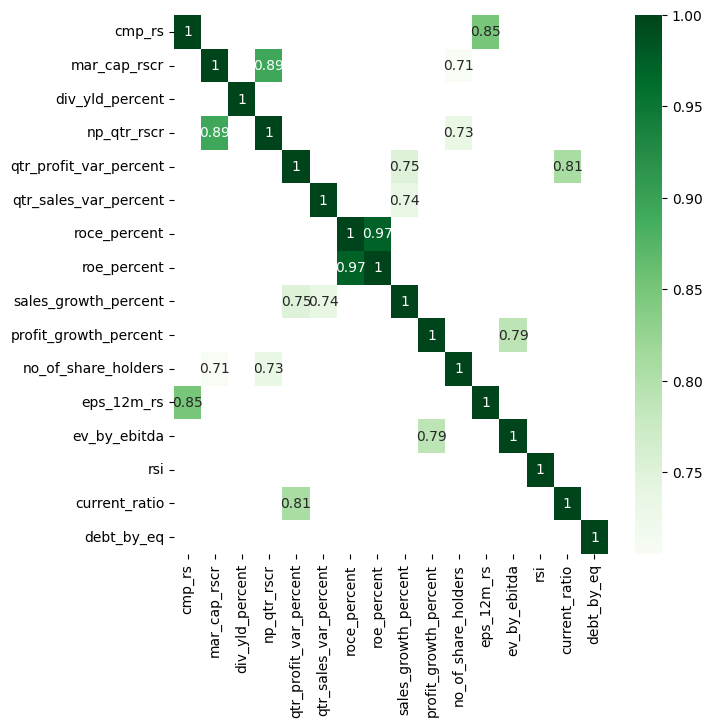

In [18]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

matrix = da

plt.figure(figsize=(7,7))
sns.heatmap(matrix, cmap="Greens", annot=True)

We need to noramlize the columns \
then we can check using bar graph if there is any relation then we can further find out the graph which we need to use 

In [19]:
df[['mar_cap_rscr','np_qtr_rscr']].head(10)

,mar_cap_rscr,np_qtr_rscr
0,144.41,2.26
1,34.84,0.05
2,363.04,-2.71
3,217.61,8.54
4,7.37,1.71
5,28690.69,337.25
6,7385.93,85.23
7,223502.12,59.00
8,1459049.11,19284.57
9,558027.92,2989.00


Normalizing the columns

In [20]:
df[['mar_cap_rscr','np_qtr_rscr']].head(5)

,mar_cap_rscr,np_qtr_rscr
0,144.41,2.26
1,34.84,0.05
2,363.04,-2.71
3,217.61,8.54
4,7.37,1.71


<Axes: >

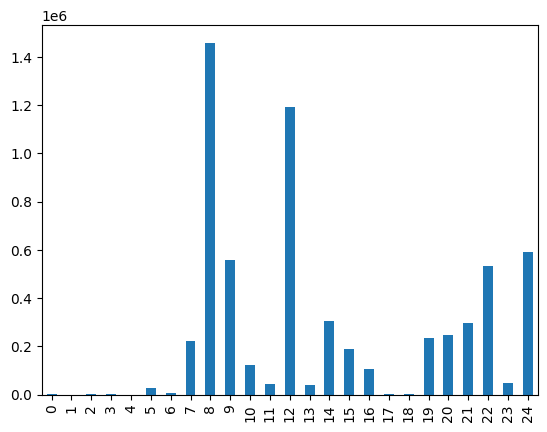

In [21]:
df['mar_cap_rscr'].plot(kind='bar')

<Axes: >

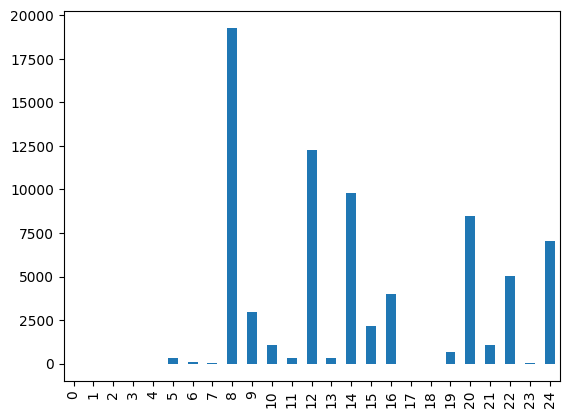

In [22]:
df['np_qtr_rscr'].plot(kind='bar')

The maximum absolute scaling rescales each feature between -1 and 1 by dividing every observation by its maximum absolute value.

In [23]:
df_max_scaled = df.copy()

column = 'np_qtr_rscr'
df_max_scaled[column] = df_max_scaled[column]/df_max_scaled[column].abs().max()

df_max_scaled['np_qtr_rscr']

0     0.000117
1     0.000003
2    -0.000141
3     0.000443
4     0.000089
5     0.017488
6     0.004420
7     0.003059
8     1.000000
9     0.154994
10    0.056351
11    0.015598
12    0.637453
13    0.016630
14    0.507330
15    0.111351
16    0.207586
17    0.000147
18    0.000302
19    0.036098
20    0.440312
21    0.054292
22    0.259958
23    0.002242
24    0.364955
Name: np_qtr_rscr, dtype: float64

The min-max approach (often called normalization) rescales the feature to a hard and fast range of [0,1] by subtracting the minimum value of the feature then dividing by the range.

In [24]:
df_min_max_scaled = df.copy() 
  
column = 'np_qtr_rscr'
df_min_max_scaled[column] = (df_min_max_scaled[column] - df_min_max_scaled[column].min()) / (df_min_max_scaled[column].max() - df_min_max_scaled[column].min())     
  
df_min_max_scaled['np_qtr_rscr']

0     0.000258
1     0.000143
2     0.000000
3     0.000583
4     0.000229
5     0.017626
6     0.004559
7     0.003200
8     1.000000
9     0.155113
10    0.056483
11    0.015736
12    0.637504
13    0.016768
14    0.507399
15    0.111476
16    0.207697
17    0.000287
18    0.000442
19    0.036233
20    0.440390
21    0.054425
22    0.260062
23    0.002382
24    0.365044
Name: np_qtr_rscr, dtype: float64

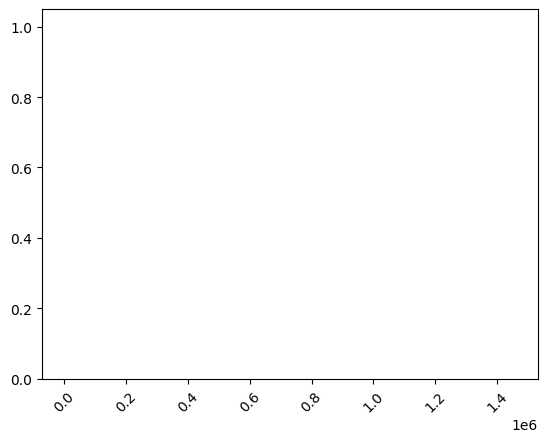

In [25]:
x = df_min_max_scaled['mar_cap_rscr']
y = df_min_max_scaled['np_qtr_rscr']


plt.bar(x,y)
plt.xticks(rotation=45)
plt.show()

The bar is not plot on the graph cuz the difference for a particular column is more between the max & min values so the bar are not visible in this graph.\
And increasing in directly proportion to each other.

Normalization for eps & cmp

In [26]:
df[['eps_12m_rs','cmp_rs']]

,eps_12m_rs,cmp_rs
0,6.21,130.00
1,0.26,16.05
2,-0.03,12.01
3,7.27,123.16
4,0.04,2.96
5,20.32,451.75
6,16.25,544.25
7,0.75,231.60
8,92.51,1906.70
9,45.72,2375.00


<Axes: >

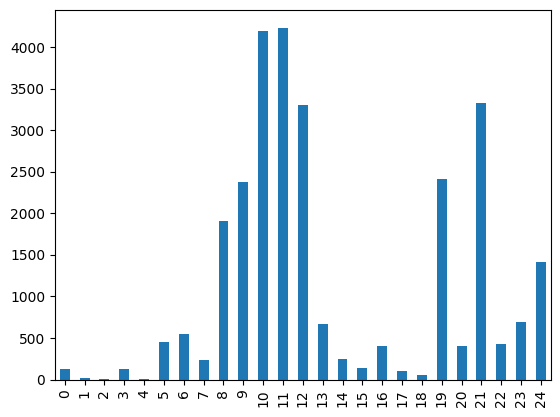

In [27]:
df['cmp_rs'].plot(kind='bar')

<Axes: >

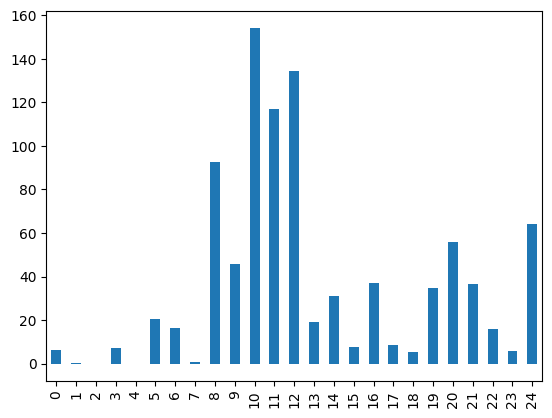

In [28]:
df['eps_12m_rs'].plot(kind='bar')

In [29]:
df_max_cmp = df.copy()

column = 'eps_12m_rs'
df_max_cmp[column] = df_max_cmp[column] / df_max_cmp[column].abs().max()

df_max_cmp[['eps_12m_rs']]

,eps_12m_rs
0,0.040249
1,0.001685
2,-0.000194
3,0.047119
4,0.000259
5,0.131700
6,0.105321
7,0.004861
8,0.599585
9,0.296325


In [30]:
df_min_max_eps = df.copy() 
  
column = 'eps_12m_rs'
df_min_max_eps[column] = (df_min_max_eps[column] - df_min_max_eps[column].min()) / (df_min_max_eps[column].max() - df_min_max_eps[column].min())     
  
df_min_max_eps['eps_12m_rs']

0     0.040435
1     0.001879
2     0.000000
3     0.047304
4     0.000454
5     0.131869
6     0.105495
7     0.005054
8     0.599663
9     0.296462
10    1.000000
11    0.756869
12    0.869816
13    0.125648
14    0.201140
15    0.048924
16    0.240798
17    0.055534
18    0.034279
19    0.226218
20    0.362299
21    0.236457
22    0.104653
23    0.036547
24    0.416991
Name: eps_12m_rs, dtype: float64

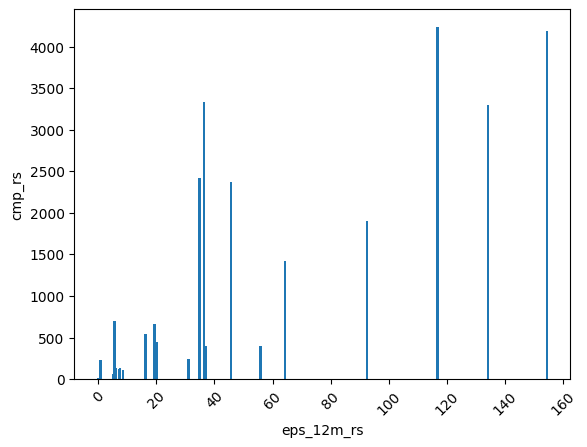

In [31]:
x = df['eps_12m_rs']
y = df['cmp_rs']

plt.bar(x,y)
plt.xticks(rotation=45)
plt.xlabel('eps_12m_rs')
plt.ylabel('cmp_rs')
plt.show()
# x,y

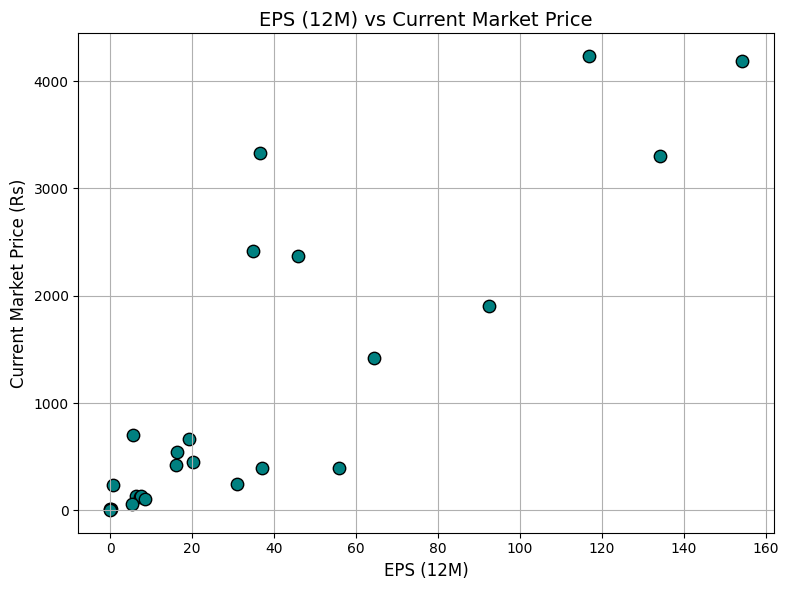

In [36]:
import matplotlib.pyplot as plt


eps = df['eps_12m_rs']
cmp = df['cmp_rs']

plt.figure(figsize=(8, 6))
plt.scatter(eps, cmp, color='teal', s=80, edgecolors='black')
plt.title('EPS (12M) vs Current Market Price', fontsize=14)
plt.xlabel('EPS (12M)', fontsize=12)
plt.ylabel('Current Market Price (Rs)', fontsize=12)
plt.grid(True)
plt.tight_layout()
plt.show()

In [99]:
df.sort_values(by='cmp_rs',ascending=False).head(2)

,id,name,cmp_rs,mar_cap_rscr,div_yld_percent,np_qtr_rscr,qtr_profit_var_percent,qtr_sales_var_percent,roce_percent,roe_percent,sales_growth_percent,profit_growth_percent,no_of_share_holders,eps_12m_rs,ev_by_ebitda,rsi,current_ratio,debt_by_eq
11,12,L&T Technology,4234.5,44834.76,1.18,300.8,-6.29,12.29,33.40,25.79,10.07,-1.28,231067.0,116.77,21.79,40.71,2.64,0.12
10,11,LTIMindtree,4191.9,124199.94,1.55,1086.7,-7.14,7.15,31.17,25.03,5.14,-0.56,433377.0,154.29,16.83,37.81,3.47,0.11


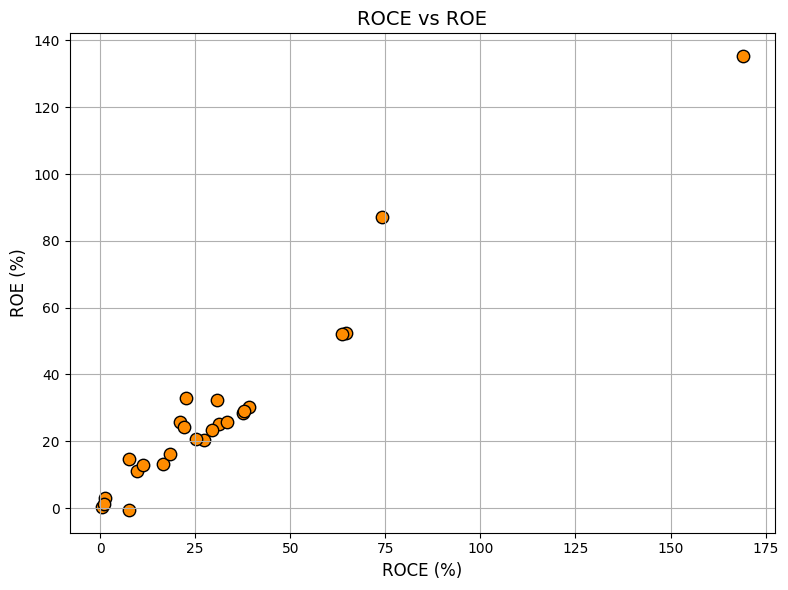

In [65]:
roce = df['roce_percent']
roe = df['roe_percent']

plt.figure(figsize=(8, 6))
plt.scatter(roce, roe, color='darkorange', s=80, edgecolors='black')
plt.title('ROCE vs ROE', fontsize=14)
plt.xlabel('ROCE (%)', fontsize=12)
plt.ylabel('ROE (%)', fontsize=12)
plt.grid(True)
plt.tight_layout()
plt.show()


In [98]:
df.sort_values(by='roe_percent',ascending=False).head(2)

,id,name,cmp_rs,mar_cap_rscr,div_yld_percent,np_qtr_rscr,qtr_profit_var_percent,qtr_sales_var_percent,roce_percent,roe_percent,sales_growth_percent,profit_growth_percent,no_of_share_holders,eps_12m_rs,ev_by_ebitda,rsi,current_ratio,debt_by_eq
19,20,Nestle India,2416.6,232998.22,0.7,696.13,-5.28,3.90,169.08,135.33,4.39,4.60,547850.0,34.88,48.66,73.56,0.75,0.09
17,18,Envirotech,107.0,201.05,0.0,2.83,24.12,-12.83,74.01,87.15,64.98,344.75,947.0,8.54,11.90,54.66,4.51,0.30


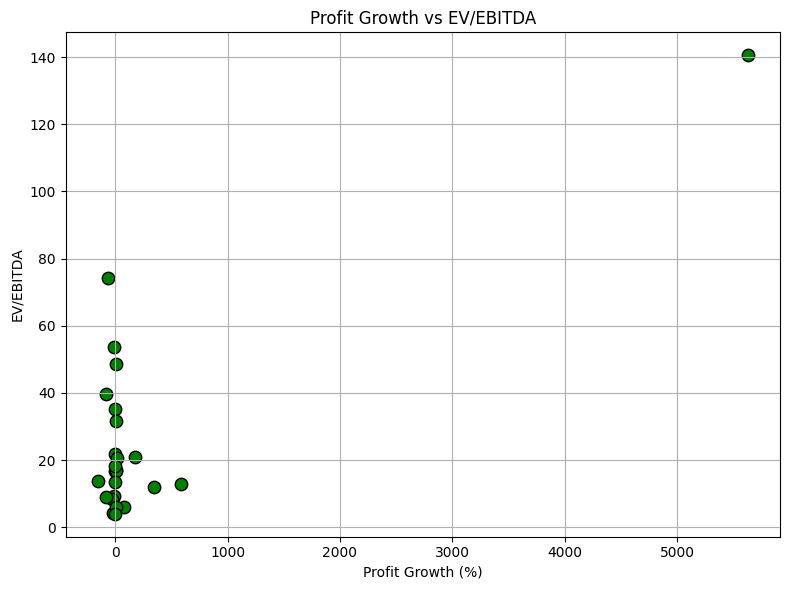

In [69]:
profit = df['profit_growth_percent']
evebita = df['ev_by_ebitda']

plt.figure(figsize=(8,6))
plt.scatter(profit,evebita,color='green',s=80,edgecolors='black')
plt.title('Profit Growth vs EV/EBITDA')
plt.xlabel('Profit Growth (%)')
plt.ylabel('EV/EBITDA')
plt.grid(True)
plt.tight_layout()
plt.show()

In [97]:
df.sort_values(by='profit_growth_percent',ascending=False).head(2)

,id,name,cmp_rs,mar_cap_rscr,div_yld_percent,np_qtr_rscr,qtr_profit_var_percent,qtr_sales_var_percent,roce_percent,roe_percent,sales_growth_percent,profit_growth_percent,no_of_share_holders,eps_12m_rs,ev_by_ebitda,rsi,current_ratio,debt_by_eq
7,8,Eternal Ltd,231.6,223502.12,0.0,59.00,-57.25,64.39,1.14,1.12,69.42,5625.0,2791930.0,0.75,140.54,62.42,2.02,0.05
0,1,MRP Agro,130.0,144.41,0.0,2.26,769.23,219.86,39.18,30.31,140.56,590.0,591.0,6.21,13.00,47.59,13.63,0.00


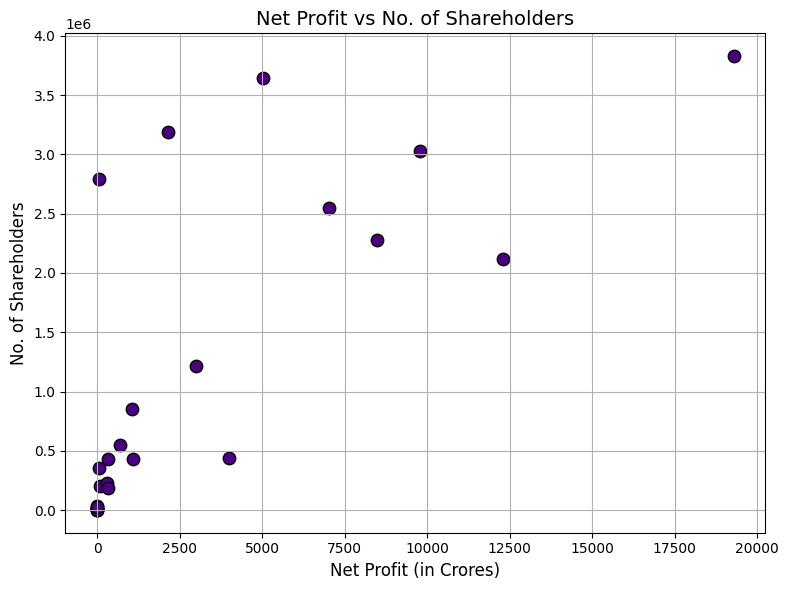

In [72]:
net_profit = df['np_qtr_rscr']
shareholders = df['no_of_share_holders']

plt.figure(figsize=(8, 6))
plt.scatter(net_profit, shareholders, color='indigo', s=80, edgecolors='black')
plt.title('Net Profit vs No. of Shareholders', fontsize=14)
plt.xlabel('Net Profit (in Crores)', fontsize=12)
plt.ylabel('No. of Shareholders', fontsize=12)
plt.grid(True)
plt.tight_layout()
plt.show()

In [96]:
df.sort_values(by='np_qtr_rscr',ascending=False).head(2)

,id,name,cmp_rs,mar_cap_rscr,div_yld_percent,np_qtr_rscr,qtr_profit_var_percent,qtr_sales_var_percent,roce_percent,roe_percent,sales_growth_percent,profit_growth_percent,no_of_share_holders,eps_12m_rs,ev_by_ebitda,rsi,current_ratio,debt_by_eq
8,9,HDFC Bank,1906.7,1459049.11,1.02,19284.57,6.88,9.25,7.51,14.53,18.59,10.78,3829146.0,92.51,17.15,70.15,0.00,6.46
12,13,TCS,3298.9,1193570.89,1.67,12293.00,-1.69,5.29,64.63,52.38,5.99,4.14,2115093.0,134.20,16.65,33.02,1.74,0.10


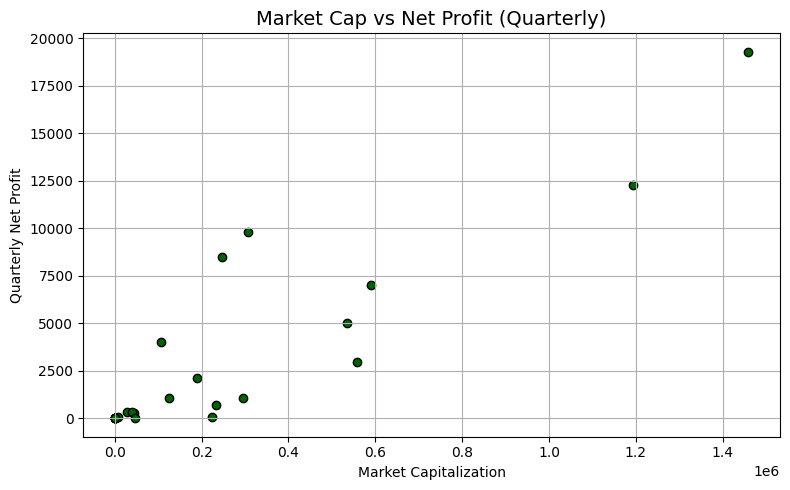

In [79]:
plt.figure(figsize=(8, 5))
plt.scatter(df['mar_cap_rscr'], df['np_qtr_rscr'], color='darkgreen', edgecolors='black')
plt.title('Market Cap vs Net Profit (Quarterly)', fontsize=14)
plt.xlabel('Market Capitalization')
plt.ylabel('Quarterly Net Profit')
plt.grid(True)
plt.tight_layout()
plt.show()

In [95]:
df.sort_values(by='mar_cap_rscr',ascending=False).head(2)

,id,name,cmp_rs,mar_cap_rscr,div_yld_percent,np_qtr_rscr,qtr_profit_var_percent,qtr_sales_var_percent,roce_percent,roe_percent,sales_growth_percent,profit_growth_percent,no_of_share_holders,eps_12m_rs,ev_by_ebitda,rsi,current_ratio,debt_by_eq
8,9,HDFC Bank,1906.7,1459049.11,1.02,19284.57,6.88,9.25,7.51,14.53,18.59,10.78,3829146.0,92.51,17.15,70.15,0.00,6.46
12,13,TCS,3298.9,1193570.89,1.67,12293.00,-1.69,5.29,64.63,52.38,5.99,4.14,2115093.0,134.20,16.65,33.02,1.74,0.10


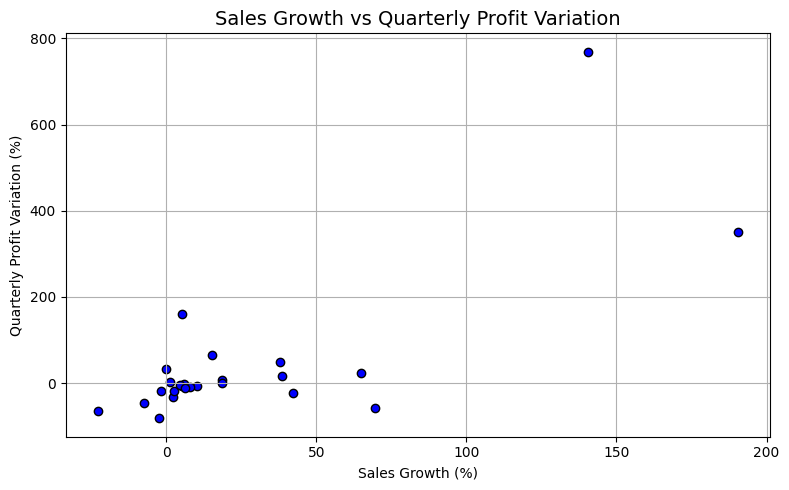

In [81]:
plt.figure(figsize=(8, 5))
plt.scatter(df['sales_growth_percent'], df['qtr_profit_var_percent'], color='blue', edgecolors='black')
plt.title('Sales Growth vs Quarterly Profit Variation', fontsize=14)
plt.xlabel('Sales Growth (%)')
plt.ylabel('Quarterly Profit Variation (%)')
plt.grid(True)
plt.tight_layout()
plt.show()


In [94]:
df.sort_values(by='mar_cap_rscr',ascending=False).head(2)

,id,name,cmp_rs,mar_cap_rscr,div_yld_percent,np_qtr_rscr,qtr_profit_var_percent,qtr_sales_var_percent,roce_percent,roe_percent,sales_growth_percent,profit_growth_percent,no_of_share_holders,eps_12m_rs,ev_by_ebitda,rsi,current_ratio,debt_by_eq
8,9,HDFC Bank,1906.7,1459049.11,1.02,19284.57,6.88,9.25,7.51,14.53,18.59,10.78,3829146.0,92.51,17.15,70.15,0.00,6.46
12,13,TCS,3298.9,1193570.89,1.67,12293.00,-1.69,5.29,64.63,52.38,5.99,4.14,2115093.0,134.20,16.65,33.02,1.74,0.10


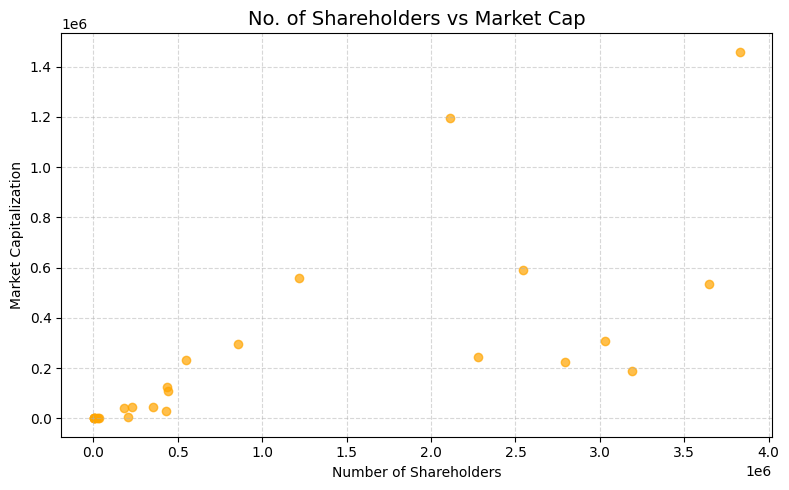

In [76]:
plt.figure(figsize=(8, 5))
plt.scatter(df['no_of_share_holders'], df['mar_cap_rscr'], color='orange', alpha=0.7)
plt.title('No. of Shareholders vs Market Cap', fontsize=14)
plt.xlabel('Number of Shareholders')
plt.ylabel('Market Capitalization')
plt.grid(True, linestyle='--', alpha=0.5)
plt.tight_layout()
plt.show()


In [93]:
df.sort_values(by='no_of_share_holders',ascending=False).head(2)

,id,name,cmp_rs,mar_cap_rscr,div_yld_percent,np_qtr_rscr,qtr_profit_var_percent,qtr_sales_var_percent,roce_percent,roe_percent,sales_growth_percent,profit_growth_percent,no_of_share_holders,eps_12m_rs,ev_by_ebitda,rsi,current_ratio,debt_by_eq
8,9,HDFC Bank,1906.70,1459049.11,1.02,19284.57,6.88,9.25,7.51,14.53,18.59,10.78,3829146.0,92.51,17.15,70.15,0.00,6.46
22,23,ITC,427.25,534665.77,3.22,5013.18,-8.40,9.28,37.47,28.43,7.73,-2.09,3647886.0,16.12,18.32,67.42,3.05,0.00


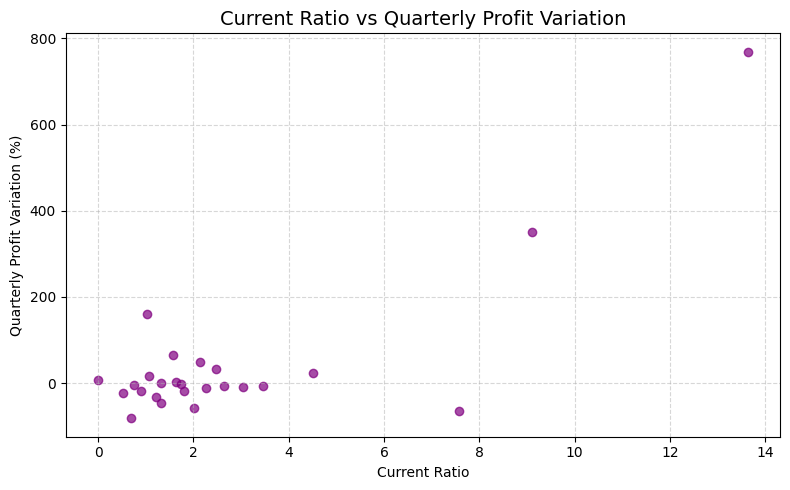

In [77]:
plt.figure(figsize=(8, 5))
plt.scatter(df['current_ratio'], df['qtr_profit_var_percent'], color='purple', alpha=0.7)
plt.title('Current Ratio vs Quarterly Profit Variation', fontsize=14)
plt.xlabel('Current Ratio')
plt.ylabel('Quarterly Profit Variation (%)')
plt.grid(True, linestyle='--', alpha=0.5)
plt.tight_layout()
plt.show()


In [91]:
df.sort_values(by='qtr_profit_var_percent',ascending=False).head(2)

,id,name,cmp_rs,mar_cap_rscr,div_yld_percent,np_qtr_rscr,qtr_profit_var_percent,qtr_sales_var_percent,roce_percent,roe_percent,sales_growth_percent,profit_growth_percent,no_of_share_holders,eps_12m_rs,ev_by_ebitda,rsi,current_ratio,debt_by_eq
0,1,MRP Agro,130.00,144.41,0.0,2.26,769.23,219.86,39.18,30.31,140.56,590.0,591.0,6.21,13.00,47.59,13.63,0.0
4,5,Evoq Remedies,2.96,7.37,0.0,1.71,350.00,7740.00,0.44,0.36,190.37,-80.0,1577.0,0.04,39.78,45.94,9.10,0.0


In [120]:
# y= df_min_max_eps['eps_12m_rs']
# x = df_min_max_eps['cmp_rs']
# plt.bar(x,y)
# plt.xticks(rotation=45)
# plt.ylabel('Normalized_eps_12m_rs')
# plt.xlabel('Normalized_cmp_rs')
# plt.show()

# x1,y1

In [121]:
# x= df_max_cmp['eps_12m_rs']
# y = df_max_cmp['cmp_rs']
# plt.bar(x,y)
# plt.xticks(rotation=45)
# plt.xlabel('Normalized_eps_12m_rs')
# plt.ylabel('Normalized_cmp_rs')
# plt.show()


In [46]:
# import matplotlib.pyplot as plt
# import numpy as np

# x = df['ev_by_ebitda'].tolist()

# plt.figure(figsize=(5,5))
# plt.hist(x)
# plt.title('hist')
# plt.show()

In [48]:
# import matplotlib.pyplot as plt
# import numpy as np

# # Generate random data
# data = np.random.randn(1000)

# # Create a histogram with density and custom color
# plt.figure(figsize=(5,5))
# plt.hist(data, bins=30, density=True, color='green', edgecolor='black', alpha=0.7)
# plt.xlabel('Values')
# plt.ylabel('Probability Density')
# plt.title('Customized Histogram with Density')
# plt.show()

In [ ]:
# import numpy as np
# import matplotlib.pyplot as plt

# plt.imshow(np.random.random((50,50)))
# plt.colorbar()
# plt.show()

import matplotlib.pyplot as plt
import numpy as np

plt.style.use('_mpl-gallery')

# make data:
x = 0.5 + np.arange(8)
y = [4.8, 5.5, 3.5, 4.6, 6.5, 6.6, 2.6, 3.0]

# plot
fig, ax = plt.subplots()

ax.bar(x, y, width=1, edgecolor="white", linewidth=0.7)

ax.set(xlim=(0, 8), xticks=np.arange(1, 8),
       ylim=(0, 8), yticks=np.arange(1, 8))

plt.show()

In [ ]:
np.arange(7)

array([0, 1, 2, 3, 4, 5, 6])

In [ ]:
plt.figure(figsize=(8, 6))
plt.hist(df['ev_by_ebitda'].dropna(), bins=20, color='purple', edgecolor='black')
plt.title("Distribution of EV/EBITDA")
plt.xlabel("EV/EBITDA")
plt.ylabel("Number of Companies")
plt.tight_layout()
plt.show()

In [ ]:
plt.figure(figsize=(8, 6))
plt.scatter(df['div_yld_percent'], df['profit_growth_percent'], alpha=0.7, color='teal')
plt.xlabel("Dividend Yield (%)")
plt.ylabel("Profit Growth (%)")
plt.title("Dividend Yield vs Profit Growth")
plt.tight_layout()
plt.show()


In [ ]:
plt.figure(figsize=(8, 6))
plt.scatter(df['ev_by_ebitda'], df['roe_percent'], alpha=0.7, color='orange')
plt.xlabel("EV/EBITDA")
plt.ylabel("ROE (%)")
plt.title("ROE vs EV/EBITDA")
plt.axhline(15, color='red', linestyle='--', label='ROE = 15%')
plt.axvline(10, color='blue', linestyle='--', label='EV/EBITDA = 10')
plt.legend()
plt.tight_layout()
plt.show()


In [ ]:
filtered_stocks = df[(df['roe_percent'] > 15) & (df['ev_by_ebitda'] < 10)]
print("Filtered Stocks Summary Table")
print(filtered_stocks[['cmp_rs', 'roe_percent', 'eps_12m_rs', 'ev_by_ebitda']])top_roe = df.nlargest('roe_percent')
plt.figure(figsize=(10, 6))
plt.barh(top_roe['cmp_rs'], top_roe['roe_percent'], color='green')
plt.xlabel("ROE (%)")
plt.title("Top 10 Stocks by ROE")
plt.gca().invert_yaxis()
plt.tight_layout()
plt.show()
print("\nKPI Summary:")
print(f"Total Companies: {len(df)}")
print(f"Filtered Companies: {len(filtered_stocks)}")
print(f"Average ROE: {df['roe_percent'].mean():.2f}%")
print(f"Average Dividend Yield: {df['div_yld_percent'].mean():.2f}%")
print(f"Average EV/EBITDA: {df['ev_by_ebitda'].mean():.2f}")


In [ ]:
data 
cols = [col.replace(" ",'_') for col,_ in data.items()]
cols = [col.replace('%','PERCENT') for col in cols]
cols = [col.replace('.','') for col in cols]
cols = [col.replace('/','BY') for col in cols]
rows = [v for k,v in data.items()]
# print(len(cols),len(rows))
# print(cols)
    # print(rows)
company_name = rows[0]
# if 
row_data = []
li =[]
for row in range(len(rows)):
    for col in range(len(rows[row])):
        for r in range(len(rows)):
            if rows[r][col] == '':
                li.append('NULL')
                continue
            li.append(rows[r][col])
        row_data.append(li)
        li=[]
    break
print(row_data)

[['ITC Hotels', '199.25', '41467.40', '0.00', '0.74', 'NULL', 'NULL', 'NULL', 'NULL', 'NULL', 'NULL', 'NULL', '2596732.00', 'NULL', 'NULL', 'NULL', '54.18'], ['ITC', '420.05', '525655.64', '3.26', '5013.18', '-8.40', '9.28', '37.47', '75160.56', '28.43', '7.73', '-2.09', '3710169.00', '12.89', '16.12', '18.01', '58.08'], ['Jubilant Food.', '688.00', '45397.31', '0.18', '43.24', '-21.97', '56.06', '11.20', '7611.34', '12.98', '42.24', '4.08', '363143.00', '19.52', '5.61', '31.32', '57.96'], ['Vedanta', '384.00', '150158.96', '11.34', '4876.00', '76.20', '10.06', '20.91', '148022.00', '10.49', '1.28', '138.51', '1999975.00', '17.76', '33.58', '5.08', '26.48'], ['Infosys', '1423.05', '591030.16', '2.66', '6822.00', '11.46', '7.58', '39.99', '159988.00', '31.83', '4.44', '13.36', '2542766.00', '15.22', '66.60', '13.32', '26.53']]


In [ ]:
cols = [col.replace(" ",'_') for col,_ in data.items()]
cols = [col.replace('%','PERCENT') for col in cols]
cols = [col.replace('.','') for col in cols]
cols = [col.replace('/','BY') for col in cols]
for i in cols:
    print(f'{i} numeric,')

Name numeric,
CMP_Rs numeric,
Mar_Cap_RsCr numeric,
Div_Yld_PERCENT numeric,
NP_Qtr_RsCr numeric,
Qtr_Profit_Var_PERCENT numeric,
Qtr_Sales_Var_PERCENT numeric,
ROCE_PERCENT numeric,
ROE_PERCENT numeric,
Sales_growth_PERCENT numeric,
Profit_growth_PERCENT numeric,
No_of_Share_Holders numeric,
EPS_12M_Rs numeric,
EV_BY_EBITDA numeric,
RSI numeric,
Current_ratio numeric,
Debt_BY_Eq numeric,


In [ ]:
for i,j in data.items():
    print(i,j)

Name ['Infosys', 'Vedanta']
CMP Rs. [1403.7, 370.55]
Mar Cap Rs.Cr. [582993.59, 144899.43]
Div Yld % [2.71, 11.74]
NP Qtr Rs.Cr. [6822.0, 4876.0]
Qtr Profit Var % [11.46, 76.2]
Qtr Sales Var % [7.58, 10.06]
ROCE % [39.99, 20.91]
Sales Rs.Cr. [159988.0, 148022.0]
ROE % [31.83, 10.49]
Sales growth % [4.44, 1.28]
Profit growth % [13.36, 138.51]
No. of Share Holders [2542766.0, 1999975.0]
Sales Var 3Yrs % [15.22, 17.76]
EPS 12M Rs. [66.6, 33.58]
EV / EBITDA [13.13, 4.95]
RSI [26.53, 26.48]


In [ ]:
dat = {'Name': []}
for i in range(3):
    dat['Name'].append(i)
print(dat)

{'Name': [0, 1, 2]}


# One single row

In [ ]:
from selenium import webdriver
from selenium.webdriver.edge.service import Service
from webdriver_manager.microsoft import EdgeChromiumDriverManager
from selenium.webdriver.common.by import By
from selenium.webdriver.common.keys import Keys # to use enter 
import time
import pandas as pd
import numpy as np

username = "melibi8600@exclussi.com"
password = "screener@12345"

driver = webdriver.Edge(service=Service(EdgeChromiumDriverManager().install()))
# driver.maximize_window()    # to maximize the web page
driver.get('https://www.screener.in/')

driver.find_element(By.XPATH,"/html/body/nav/div[2]/div/div/div/div[2]/div[2]/a[1]").click()
driver.find_element(By.NAME,"username").send_keys(username)
time.sleep(2)
driver.find_element(By.NAME,"password").send_keys(password)
time.sleep(1)
driver.find_element(By.XPATH,"/html/body/main/div[2]/div[2]/form/button").click()
time.sleep(3)
driver.find_element(By.XPATH,"/html/body/div/div[2]/main/div[1]/div[2]/a[1]").click()

li_d=[]
data = {}

for i in range(2,19):
    head = driver.find_element(By.XPATH,f'/html/body/main/div[3]/div[3]/table/tbody/tr[1]/th[{i}]').text 
    if i >= 2: 
        value=driver.find_element(By.XPATH,f'/html/body/main/div[3]/div[3]/table/tbody/tr[2]/td[{i+1}]').text
        if value.isalpha():
            pass
        else:
            value=float(value)
    data[head]=value
    head,value='',''
    
# data.append(data)
df = pd.DataFrame(data,index=[1])
print(df)
# print(data)
# df.to_csv('stock.csv',index=False)
time.sleep(5)
driver.close()

      Name  CMP Rs.  Mar Cap Rs.Cr.  Div Yld %  NP Qtr Rs.Cr.  \
1  Infosys   1403.7       582993.59       2.71         6822.0   

   Qtr Profit Var %  Qtr Sales Var %  ROCE %  Sales Rs.Cr.  ROE %  \
1             11.46             7.58   39.99      159988.0  31.83   

   Sales growth %  Profit growth %  No. of Share Holders  Sales Var 3Yrs %  \
1            4.44            13.36             2542766.0             15.22   

   EPS 12M Rs.  EV / EBITDA    RSI  
1         66.6        13.13  26.53  


In [ ]:
import psycopg2

conn = None
cur = None

try:
    conn = psycopg2.connect(host='localhost', dbname='postgres',user='postgres',password="mypass",port=5431)
    cur = conn.cursor()
    cols = [col.replace(" ",'_') for col,_ in data.items()]
    cols = [col.replace('%','PERCENT') for col in cols]
    cols = [col.replace('.','') for col in cols]
    cols = [col.replace('/','BY') for col in cols]
    rows = [v for k,v in data.items()]
    print(len(cols),len(rows))
    print(cols)
    print(rows)
    # ind = []


    cur.execute(f"""
                insert into stocks ({', '.join(cols)})
                values ({', '.join(['%s'] * len(cols))})
            """,rows)
    print("done")
    conn.commit()
    print('Inserted into stocks')
except Exception as e:
    print(e)
finally:
    if cur is not None:
        cur.close()
    if conn is not None:
        conn.close()

17 17
['Name', 'CMP_Rs', 'Mar_Cap_RsCr', 'Div_Yld_PERCENT', 'NP_Qtr_RsCr', 'Qtr_Profit_Var_PERCENT', 'Qtr_Sales_Var_PERCENT', 'ROCE_PERCENT', 'Sales_RsCr', 'ROE_PERCENT', 'Sales_growth_PERCENT', 'Profit_growth_PERCENT', 'No_of_Share_Holders', 'Sales_Var_3Yrs_PERCENT', 'EPS_12M_Rs', 'EV_BY_EBITDA', 'RSI']
['Infosys', 1403.7, 582993.59, 2.71, 6822.0, 11.46, 7.58, 39.99, 159988.0, 31.83, 4.44, 13.36, 2542766.0, 15.22, 66.6, 13.13, 26.53]
done
Inserted into stocks


In [ ]:
data

{'Name': 'Vedanta',
 'CMP Rs.': 370.5,
 'Mar Cap Rs.Cr.': 144879.88,
 'Div Yld %': 11.8,
 'NP Qtr Rs.Cr.': 4876.0,
 'Qtr Profit Var %': 76.2,
 'Qtr Sales Var %': 10.06,
 'ROCE %': 20.91,
 'Sales Rs.Cr.': 148022.0,
 'ROE %': 10.49,
 'Sales growth %': 1.28,
 'Profit growth %': 138.51,
 'No. of Share Holders': 1999975.0,
 'Sales Var 3Yrs %': 17.76,
 'EPS 12M Rs.': 33.58,
 'EV / EBITDA': 4.95,
 'RSI': 27.58}

In [ ]:
cols = [col for col,_ in data.items()]
rows = [v for k,v in data.items()]
print(len(cols),len(rows))

17 17


In [ ]:
z = ["Name","id"]
z

['Name', 'id']

In [ ]:
# df['sp']=df['Sales Rs.Cr.']*df['Profit growth %']
# df.info()
df.drop(['sp'],axis=1)

,Name,CMP Rs.,Mar Cap Rs.Cr.,Div Yld %,NP Qtr Rs.Cr.,Qtr Profit Var %,Qtr Sales Var %,ROCE %,Sales Rs.Cr.,ROE %,Sales growth %,Profit growth %,No. of Share Holders,Sales Var 3Yrs %,EPS 12M Rs.,EV / EBITDA,RSI
1,Vedanta,370.5,144879.88,11.8,4876.0,76.2,10.06,20.91,148022.0,10.49,1.28,138.51,1999975.0,17.76,33.58,4.95,27.58


In [ ]:
d = {'Name': 'Vedanta', 'CMP Rs.': '370.75', 'Mar Cap Rs.Cr.': '144977.65', 'Div Yld %': '11.80', 'NP Qtr Rs.Cr.': '4876.00', 'Qtr Profit Var %': '76.20', 'Qtr Sales Var %': '10.06', 'ROCE %': '20.91', 'Sales Rs.Cr.': '148022.00', 'ROE %': '10.49', 'Sales growth %': '1.28', 'Profit growth %': '138.51', 'No. of Share Holders': '1999975.00', 'Sales Var 3Yrs %': '17.76', 'EPS 12M Rs.': '33.58', 'EV / EBITDA': '4.96', 'RSI': '27.58'}
for k,v in d.items():
    print(f'"{k}" float,')

In [ ]:
for i in cols:
    print(f"{i} float,")

Name float,
CMP_Rs float,
Mar_Cap_RsCr float,
Div_Yld_PERCENT float,
NP_Qtr_RsCr float,
Qtr_Profit_Var_PERCENT float,
Qtr_Sales_Var_PERCENT float,
ROCE_PERCENT float,
Sales_RsCr float,
ROE_PERCENT float,
Sales_growth_PERCENT float,
Profit_growth_PERCENT float,
No_of_Share_Holders float,
Sales_Var_3Yrs_PERCENT float,
EPS_12M_Rs float,
EV_BY_EBITDA float,
RSI float,


In [ ]:
'98'.isdigit()

True

In [ ]:
rows, cols = 3,6
my_matrix = [([0]*cols) for i in range(rows)]
my_matrix

[[0, 0, 0, 0, 0, 0], [0, 0, 0, 0, 0, 0], [0, 0, 0, 0, 0, 0]]

### Code to automate YT shorts scrolling action

```python
# Automate scrolling action for YT shorts

from selenium import webdriver
from selenium.webdriver.edge.service import Service
from webdriver_manager.microsoft import EdgeChromiumDriverManager
from selenium.webdriver.common.by import By
from selenium.webdriver.common.keys import Keys # to use enter 
import time

driver = webdriver.Edge(service=Service(EdgeChromiumDriverManager().install()))
# driver.maximize_window()    # to maximize the web page
driver.get('https://www.youtube.com/shorts/jxHyGE_WuVM')
time.sleep(5)

# input = driver.find_element(By.XPATH,'/html/body/main/div[2]/div/div/div/input')
input = driver.find_element(By.XPATH,'/html/body/ytd-app/div[1]/ytd-page-manager/ytd-shorts/div[3]/div[2]/ytd-reel-video-renderer[1]/div[1]/div[2]/div[1]/ytd-player/div/div/div[8]/button')
input.click()

for i in range(5):
    next=driver.find_element(By.XPATH,'/html/body/ytd-app/div[1]/ytd-page-manager/ytd-shorts/div[5]/div[2]/ytd-button-renderer/yt-button-shape/button/yt-touch-feedback-shape/div/div[2]')
    next.click()
    time.sleep(5)


```

In [ ]:

# Automate scrolling action for YT shorts

from selenium import webdriver
from selenium.webdriver.edge.service import Service
from webdriver_manager.microsoft import EdgeChromiumDriverManager
from selenium.webdriver.common.by import By
from selenium.webdriver.common.keys import Keys # to use enter 
import time

driver = webdriver.Edge(service=Service(EdgeChromiumDriverManager().install()))
# driver.maximize_window()    # to maximize the web page
driver.get('https://www.youtube.com/shorts/jxHyGE_WuVM')
time.sleep(5)

# input = driver.find_element(By.XPATH,'/html/body/main/div[2]/div/div/div/input')
input = driver.find_element(By.XPATH,'/html/body/ytd-app/div[1]/ytd-page-manager/ytd-shorts/div[3]/div[2]/ytd-reel-video-renderer[1]/div[1]/div[2]/div[1]/ytd-player/div/div/div[8]/button')
input.click()

for i in range(5):
    next=driver.find_element(By.XPATH,'/html/body/ytd-app/div[1]/ytd-page-manager/ytd-shorts/div[5]/div[2]/ytd-button-renderer/yt-button-shape/button/yt-touch-feedback-shape/div/div[2]')
    next.click()
    time.sleep(5)


```